# Welcome to kmeans! 🌎

In this lab, you will continue your exploration of machine learning by doing some k-means clustering! 

A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

<hr style="color: #DD3403;">


Every year, the UN Sustainable Development Solutions Network (SDSN) creates a **report** detailing the "happiness" of various countries in the world. Utilizing economic, social, and health data, they create the [World Happiness Report](https://worldhappiness.report/about/). Curators of the report **observed survey data** of seven variables (GDP Per Capita, Social Support, Life Expectancy, Freedom, Generosity, Corruption, and Dystopia), estimating their **associations with life** evaluations, ultimately coming up with a `Happiness Score` for each country.  

Some of their report uses data that we can analyze for this lab. We've collected a version of the 2023 **World Happiness** into a dataset and provided it in **CSV format** - it's the `happiness-report-2023.csv` file! 

## Puzzle 1.1: Loading In

Load the **World Happiness Dataset** from `happiness-report-2023.csv` and store it in the DataFrame `df`:

In [11]:
import pandas as pd
df = pd.read_csv('happiness-report-2023.csv')


Let's explore a bit about our dataset. It's always good practice to explore and understand your data before performing any machine learning task. Generate the **correlation coefficient matrix** of our **World Happiness Dataset**, `df` in the cell below:

Note: Some versions of Pandas will not run the `.corr()` function on DataFrames with non-numerical columns. There is a `numeric_only` argument in `.corr()` that you can set to `True` to only include numerical columns in correlation coefficient matrix. It should look like `.corr(numeric_only = True)`.

In [13]:
df.corr(numeric_only = True)

,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
Happiness Score,1.000000,0.784367,0.834532,0.746928,0.662924,0.044082,-0.471911,0.494452
GDP Per Capita,0.784367,1.000000,0.738069,0.837533,0.451439,-0.156456,-0.436961,-0.044568
Social Support,0.834532,0.738069,1.000000,0.725524,0.541630,0.036574,-0.272490,0.148731
Healthy Life Expectancy,0.746928,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,-0.014420
Freedom,0.662924,0.451439,0.541630,0.415092,1.000000,0.170229,-0.383786,0.211993
Generosity,0.044082,-0.156456,0.036574,-0.135036,0.170229,1.000000,-0.122653,0.016380
Corruption,-0.471911,-0.436961,-0.272490,-0.404396,-0.383786,-0.122653,1.000000,-0.004467
Dystopia,0.494452,-0.044568,0.148731,-0.014420,0.211993,0.016380,-0.004467,1.000000


### Group Analysis: Correlations


**Q1: Which two columns were the most highly correlated, producing a coefficient of `0.837533`? Given the real-life context, does this make sense? Why or why not?**

*(✏️ This is the Healthy Life Expectancy and GDP Per Capita. Since GDP per capita is an economic metric that measures the economic output of a country per person than it indicates that a person who makes more money would live a healthy life style.✏️)*

**Q2: All of the columns in our dataset show significant correlation with `Happiness Score` except for `Generosity` (with a coefficient of `0.044082`).This means there is almost no relationship between the perceived `Generosity` of a country and its `Happiness Score`. Explain why you think this is the case.**

*(✏️ Generosity depends per person so anyone can be generous. If someone is not happy they can be generous to make themselves feel better and if someone is happy they can show a tendency to be more generous to share happiness. At the same time someone who is not happy may not be generous for they may be very stressed and may tend to not think of others. All the while someone who is happy may think everyone else is happy or just simply do not feel the need to be generous because they are happy for the work they put in life and everyone should strive for doing the same so being generous is a form of lying.  ✏️)*


Now, let's visualize the relationships between some variables in our dataset. 

Generate a scatter plot showing the relationship between `GDP Per Capita` and `Healthy Life Expectancy`. Remember to specify these columns as the **x** and **y** of the scatter plot.


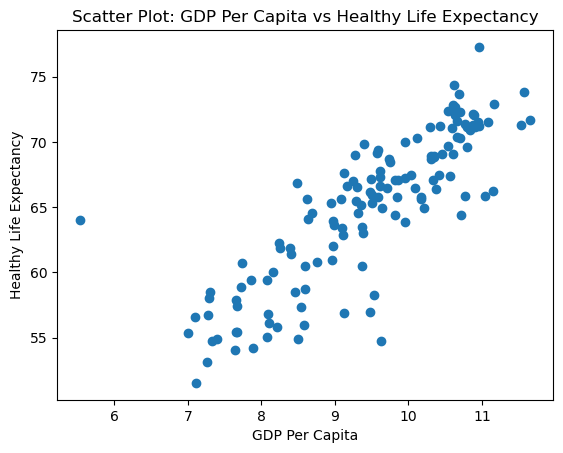

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['GDP Per Capita'], df['Healthy Life Expectancy'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.title('Scatter Plot: GDP Per Capita vs Healthy Life Expectancy')
plt.show()


*(✏️ No clear groups in this relationship


 ✏️)*

Relationship between `Happiness Score` and `Generosity`:

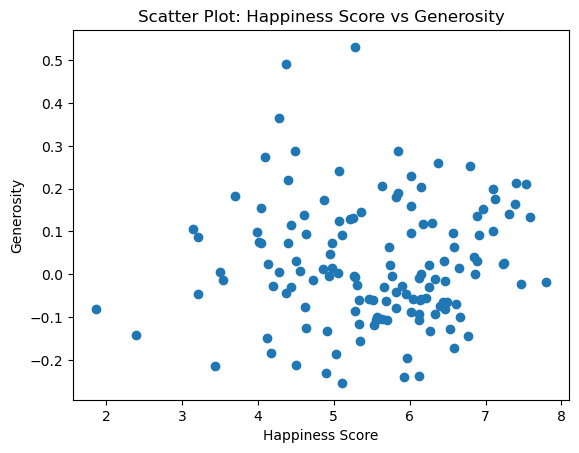

In [15]:
plt.scatter(df['Happiness Score'], df['Generosity'])
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.title('Scatter Plot: Happiness Score vs Generosity')
plt.show()

*(✏️ Everything still seems to be all one big mesh
 ✏️)*

<hr style="color: #DD3403;">

# Clustering

With a **k-means clustering** model, we will be able to both:
- Identify potential relationships between **non-linear** variables, and
- Identify the **most important *features*** of our dataset by looking at **cluster centroids**

KMeans clustering is a method of **unsupervised** machine learning, we will **allow the model** to determine **groups of the data** based on their similarity alone. 




In [16]:
# Import the KMeans library:
from sklearn.cluster import KMeans
# Create a KMeans model:
kmeans = KMeans(n_clusters = 2)


The k-means model only works on **numeric data** (*you can't find a mean -- or average -- of non-numbers*). 

In [17]:
numeric_columns = ['Happiness Score', 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption','Dystopia']
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

In [26]:
kmeans.fit(df[numeric_columns])

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Missing Data

The **error message** above provides details on several solutions to dealing with **missing data**. To continue to use `KMeans`, our best option is to **drop rows with missing data**. 


In [19]:
df2 = df.dropna()
df2

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2.110
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,-0.110


Normalizing the Numeric Data

Means are **VERY sensitive** to **outliers**. Since our data comes from **different ranges**, we must **normalize the numeric data**. To **normalize the data**, we can divide **each numeric column** by the **maximum value** of the column. This is done in the provided code below.

In [21]:
for column in numeric_columns:
    df2[column] = df2[column] / df2[column].abs().max()
df2[numeric_columns]

C:\Users\conra\AppData\Local\Temp\ipykernel_60652\3278795095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = df2[column] / df2[column].abs().max()


,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,1.000000,0.925557,0.985758,0.920678,1.000000,-0.035782,0.195910,0.799662
1,0.972066,0.940137,0.970498,0.921972,0.971904,0.252354,0.210980,0.705245
2,0.964890,0.934477,1.000000,0.932324,0.973985,0.397363,0.719053,0.761421
3,0.957586,0.912436,0.959308,0.940696,0.841831,-0.043315,0.762110,0.910660
4,0.948616,0.938422,0.946083,0.925854,0.922997,0.401130,0.407966,0.714044
...,...,...,...,...,...,...,...,...
132,0.410943,0.600943,0.663276,0.716550,0.690947,0.161959,0.897740,0.393232
133,0.410559,0.655317,0.701933,0.699405,0.680541,-0.086629,0.824543,0.306261
134,0.402101,0.634134,0.564598,0.710404,0.686785,0.197740,0.923574,0.413198
135,0.306509,0.812864,0.539166,0.855965,0.493236,-0.265537,0.959096,-0.037225


Training with `numeric_columns` from `df2`

Now that we have handled missing data and normalized the numeric data, we can **train our model**! Using the `numeric_columns` and `df2`, `fit` your `kmeans` model:

In [22]:
kmeans.fit(df2[numeric_columns])


c:\Users\conra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

Centroids

`kmeans.cluster_centers_` will display the location of the **final centroids**.

The **order they're displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

In [24]:
kmeans.cluster_centers_

array([[ 0.67568319,  0.78921639,  0.78415163,  0.82679484,  0.7964182 ,
        -0.0765388 ,  0.84260382,  0.61013804],
       [ 0.79104524,  0.86117015,  0.87799916,  0.87284786,  0.87485089,
         0.32456019,  0.63482895,  0.58194049]])

In [27]:
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

### Analysis: Centroids

**Q5: In the following cell, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happier"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)



*(✏️ The countries with social support are to be 'happier countries'. This is based off of the generosity being so low and the correlation between generosity and happiness is practically non existant so the opposite of this is looking at the higher values and the highest is social support ✏️)*

Prediction

Now, we can use our model to **assign each country** in our dataset to one of the two **clusters**!

In [28]:
df2['cluster'] = kmeans.labels_

C:\Users\conra\AppData\Local\Temp\ipykernel_60652\2367147959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = kmeans.labels_


Visualizing Your Model

In the cell below, we've used `df2.plot.scatter()` to display a **scatter plot** of some columns of our data. We specify the **parameter** `c` (color) to be the `cluster` of each data point, visualizing the **two clusters** in **two different colors**. 

The columns in the scatter plot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

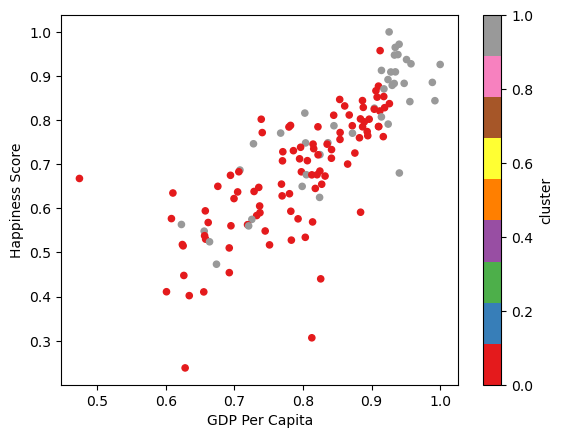

In [30]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="cluster",
    colormap='Set1'
)

*(✏️ The points are intermingled, The graph is trying to show all 8 traits where only 2 traits are highlighted of each country on a 2-d graph which is hard to visualize. ✏️)*

Next, using the code from **above** as a template, we will produce a scatter plot so that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Social Support', ylabel='Happiness Score'>

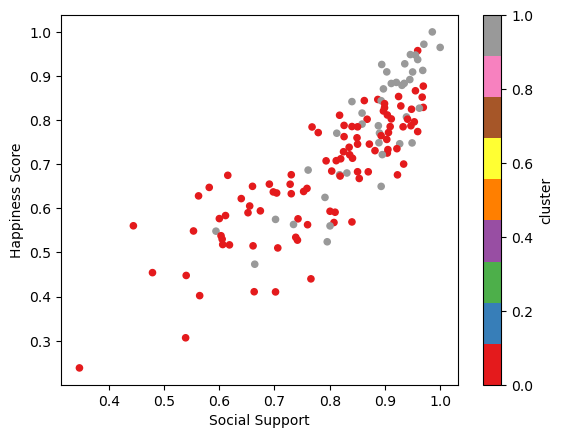

In [31]:
df2.plot.scatter(
    x='Social Support', 
    y='Happiness Score',
    c="cluster",
    colormap='Set1'
)

*(✏️ There are no clean clusters, you can not really tell any correlation between anything, the only thing you can see is which countries have a high happiness score or social support but you can't claim a correlation. ✏️)*

Finally, a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Healthy Life Expectancy', ylabel='Happiness Score'>

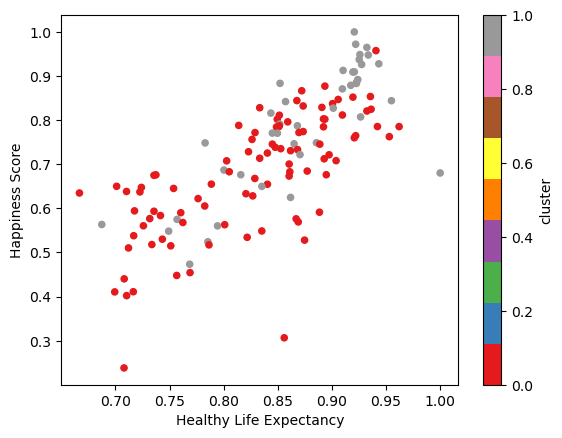

In [32]:
df2.plot.scatter(
    x='Healthy Life Expectancy', 
    y='Happiness Score',
    c="cluster",
    colormap='Set1'
)

*(✏️ the points are intermingled, it is hard to derive any correlation between any of the points. Just because there is a low healthy life expectancy and high happiness score you can not claim they are related for there are 6 other factors that are determining each of these scores. ✏️)*

<hr style="color: #DD3403;">

A Third Cluster
Our first `kmeans` model was created with only **two (2) clusters**. This is a valid start, but perhaps **more clusters** suit the dataset better. 

Let's experiment by adding **an additional cluster** and observe any differences in model results!

Creating and Training our Model

KMeans model named `kmeans_three` that contains **three (3) clusters**:


In [33]:
kmeans_three = KMeans(n_clusters = 3)

Recall that k-means models can only be fit to **numeric data**, and the data **cannot be NaN**. 

Using the `numeric_columns` and `df2`:

In [34]:
kmeans_three.fit(df2[numeric_columns])

c:\Users\conra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Model Centroids

Explore the **centroids** of your `kmeans_three` model alongside the  **numeric columns** by **running the cells below**:

Remember, the **order of numbers displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

In [36]:
kmeans_three.cluster_centers_

array([[ 0.73551405,  0.84505893,  0.8566764 ,  0.866435  ,  0.82127152,
        -0.16502643,  0.83935206,  0.59697069],
       [ 0.59618145,  0.70985249,  0.70309257,  0.7729485 ,  0.76836629,
         0.22485876,  0.85890205,  0.60574619],
       [ 0.8838256 ,  0.93321898,  0.92599186,  0.91524489,  0.92464447,
         0.20935342,  0.46210083,  0.60513254]])

In [37]:
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

## Prediction
Now, we are going to predict the closest cluster centroids for each of our rows (countries). Using `kmeans_three` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `three_cluster`:

In [38]:
df2['three_cluster'] = kmeans_three.predict(df2[numeric_columns])

C:\Users\conra\AppData\Local\Temp\ipykernel_60652\2503126229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['three_cluster'] = kmeans_three.predict(df2[numeric_columns])


Now that we've trained and predicted our `kmeans_three` model, we can visualize a **scatter plot** of our data in clusters. We specify the **parameter** `c` (color) to be the `three_cluster` of each data point, visualizing the **three clusters** in **three different colors**.

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

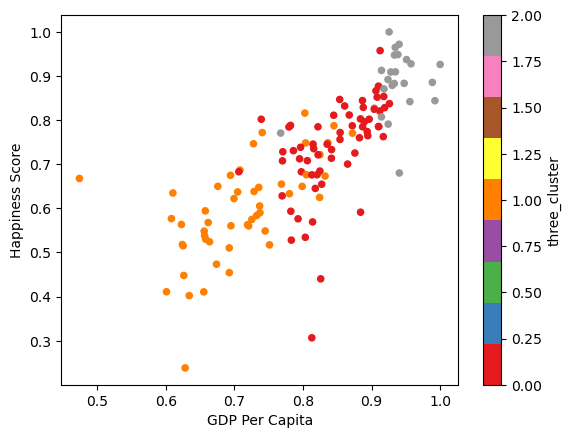

In [40]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="three_cluster",
    colormap='Set1'
)

*(✏️ There seem to be cleaner clusters. This can show that each of the countries in each of their clusters indicate some trend which explains the clean clusters, this can also mean that the other 5 traits are similar to eachother. ✏️)*

Next,a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color**:

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

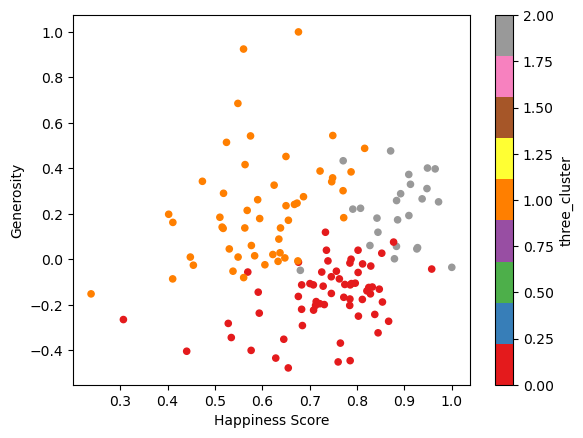

In [41]:
df2.plot.scatter(
    x='Happiness Score', 
    y='Generosity',
    c="three_cluster",
    colormap='Set1'
)


*(✏️ There are clean clusters. Once again you can not explain the correlation between Happiness and correlation based on this graph because once again there are 5 other traits contributing to these points, if you look at orange and gray they both lay on the same generosity level and yet gray is happier and orange is not, this is because gray may have another trait not listed in the graph that is influencing its happiness score, once again something that we can not see from this 2-d model. ✏️)*

a **scatter plot** of `df2`:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` 
- Visualize the **clusters by color**:

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

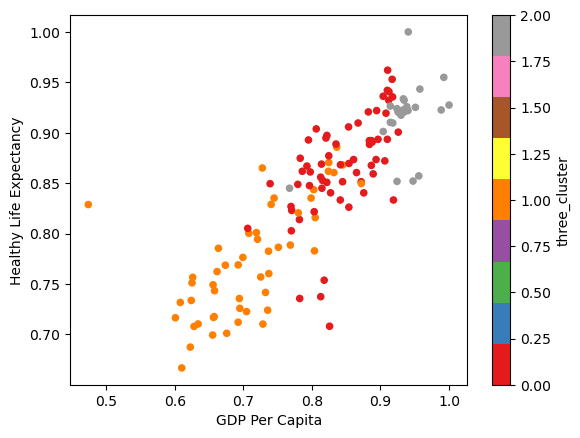

In [42]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Healthy Life Expectancy',
    c="three_cluster",
    colormap='Set1'
)


*(✏️ There are clean clusters. It seems like this graph can make sense for the correlation of the healthy life expectancy and GDP per capita. You can see a slight pattern, however orange seems to be more spread and in some cases beats red and gray, although you can say that there is a correlation between HLE and GDP per Capita it must also be acknowledged that there are other factors contributing to a HLE.  ✏️)*

*(✏️ Having a three-cluster Kmeans model is much better that having a two-cluster. Upon doing my own investigation I found that having a five-cluster Kmeans is the most optimal, there are cleaner clusters. However going to the three-clusters you can see in the gdp and health chart that there must be some correlation for if not then the the points would be intermingled such as seen in a two-cluster. Further I think that the fact that there looks like there is a line in the first and third graphs of the three-clusters there has to be a correlation between the two since it looks like it is going in a positive direction, again of course there are 5 other attributes that contribute to the points hence why you have some outliers but you overall there is a trend. ✏️)*

*Side Note:* If you are curious, there are **numeric metrics** in the `sklearn.metrics` module that can be used to evaluate clustering models **quantitatively**. Feel free to investigate any of those metrics on your own time (**not required** for this lab). One example of such a metric is **silhouette score** - which measures how similar an object is to its own cluster versus neighboring cluster(s).

<hr style="color: #DD3403;">